In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
import zipfile

# Unzip and read the CSV file
with zipfile.ZipFile('/content/emails.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/mnt/data/')

# Load dataset
df = pd.read_csv('/content/emails.csv.zip')

# Inspect the column names
print(df.columns)



Index(['text', 'spam'], dtype='object')


In [6]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if isinstance(text, str):
        # Lowercase
        text = text.lower()
        # Remove punctuation
        text = re.sub(r'\W', ' ', text)
        # Tokenize
        words = text.split()
        # Remove stop words and lemmatize
        words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
        return ' '.join(words)
    else:
        return ''

# Apply preprocessing
df['processed_text'] = df['text'].apply(preprocess_text)



In [7]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['processed_text']).toarray()
y = df['spam'].astype(int)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

Accuracy: 0.9808027923211169
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       856
           1       0.97      0.95      0.96       290

    accuracy                           0.98      1146
   macro avg       0.98      0.97      0.97      1146
weighted avg       0.98      0.98      0.98      1146

Confusion Matrix:
 [[848   8]
 [ 14 276]]


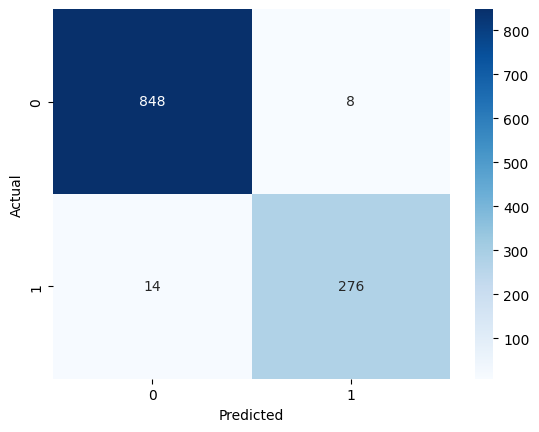

In [10]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
# Save the vectorizer and model
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(model, 'spam_classifier.pkl')


['spam_classifier.pkl']

In [12]:
# Load the model and vectorizer
vectorizer = joblib.load('tfidf_vectorizer.pkl')
model = joblib.load('spam_classifier.pkl')

def predict_spam(email):
    # Preprocess
    email = preprocess_text(email)
    # Vectorize
    email_vectorized = vectorizer.transform([email]).toarray()
    # Predict
    prediction = model.predict(email_vectorized)
    return 'spam' if prediction[0] else 'ham'

# Test with a new email
print(predict_spam("Congratulations! You've won a $1,000 gift card. Click here to claim now!"))


spam
